In [1]:
!pip install chart_studio
!pip install windrose
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from windrose import WindroseAxes
import os

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
os.chdir(r'C:\Users\vigne\Desktop\WORK\DATASETS')

In [3]:
df=pd.read_csv('Turbine_Data_Kelmarsh_1.csv', skiprows=9)

In [4]:
df.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(52704, 299)

In [6]:
df.describe()

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
count,52236.000000,51982.000000,51982.000000,51982.000000,52704.000000,52154.000000,51900.000000,51492.000000,51900.000000,52236.000000,...,51982.000000,48321.000000,48321.000000,48321.000000,48321.000000,48308.000000,48308.000000,48308.000000,48321.000000,48321.000000
mean,6.524402,0.964932,4.659358,8.340368,6.132240,6.969234,0.904163,5.299868,8.682265,6.524897,...,29.769359,14.586997,123.517004,9.136360,62.101945,9.010845,9.010692,0.000076,28.721020,14.020241
std,3.011010,0.497087,2.361830,3.798761,0.675291,3.176265,0.460634,2.570444,3.877807,3.011037,...,18.325773,10.240077,69.245610,6.230724,41.271704,4.991959,4.991851,0.008125,15.966020,9.498869
min,0.258319,0.000000,0.037126,0.487500,5.200000,0.000000,0.000000,0.000000,0.000000,0.275138,...,3.237786,1.321278,3.278675,0.931146,5.521234,3.013570,3.013570,0.000000,0.000000,0.000000
25%,4.313493,0.604298,2.922914,5.617817,5.400000,4.695175,0.570155,3.459061,5.911967,4.310085,...,17.878002,7.567892,79.435844,4.923431,36.041920,4.819203,4.819203,0.000000,18.544827,8.023546
50%,6.225888,0.881117,4.530055,7.822500,6.050000,6.687072,0.839953,5.158684,8.219324,6.230436,...,26.528803,12.571681,119.756432,7.698681,54.879974,7.210582,7.210582,0.000000,28.170146,12.394411
75%,8.311649,1.226774,6.101835,10.559041,6.700000,8.911998,1.157208,6.847391,11.026901,8.316810,...,38.122170,19.259504,163.259262,11.819488,78.948601,12.586030,12.586030,0.000000,38.143859,17.892182
max,22.419562,5.559541,16.977695,32.929501,7.100000,23.833506,4.967301,19.129086,32.514721,22.729181,...,243.026108,175.623352,744.848145,78.310364,728.089294,33.621243,33.621243,1.035189,171.593130,165.537134


In [7]:
df.isnull().sum()

# Date and time                                0
Wind speed (m/s)                             468
Wind speed, Standard deviation (m/s)         722
Wind speed, Minimum (m/s)                    722
Wind speed, Maximum (m/s)                    722
                                            ... 
Drive train acceleration, Max (mm/ss)       4396
Drive train acceleration, Min (mm/ss)       4396
Drive train acceleration, StdDev (mm/ss)    4396
Tower Acceleration X, StdDev (mm/ss)        4383
Tower Acceleration Y, StdDev (mm/ss)        4383
Length: 299, dtype: int64

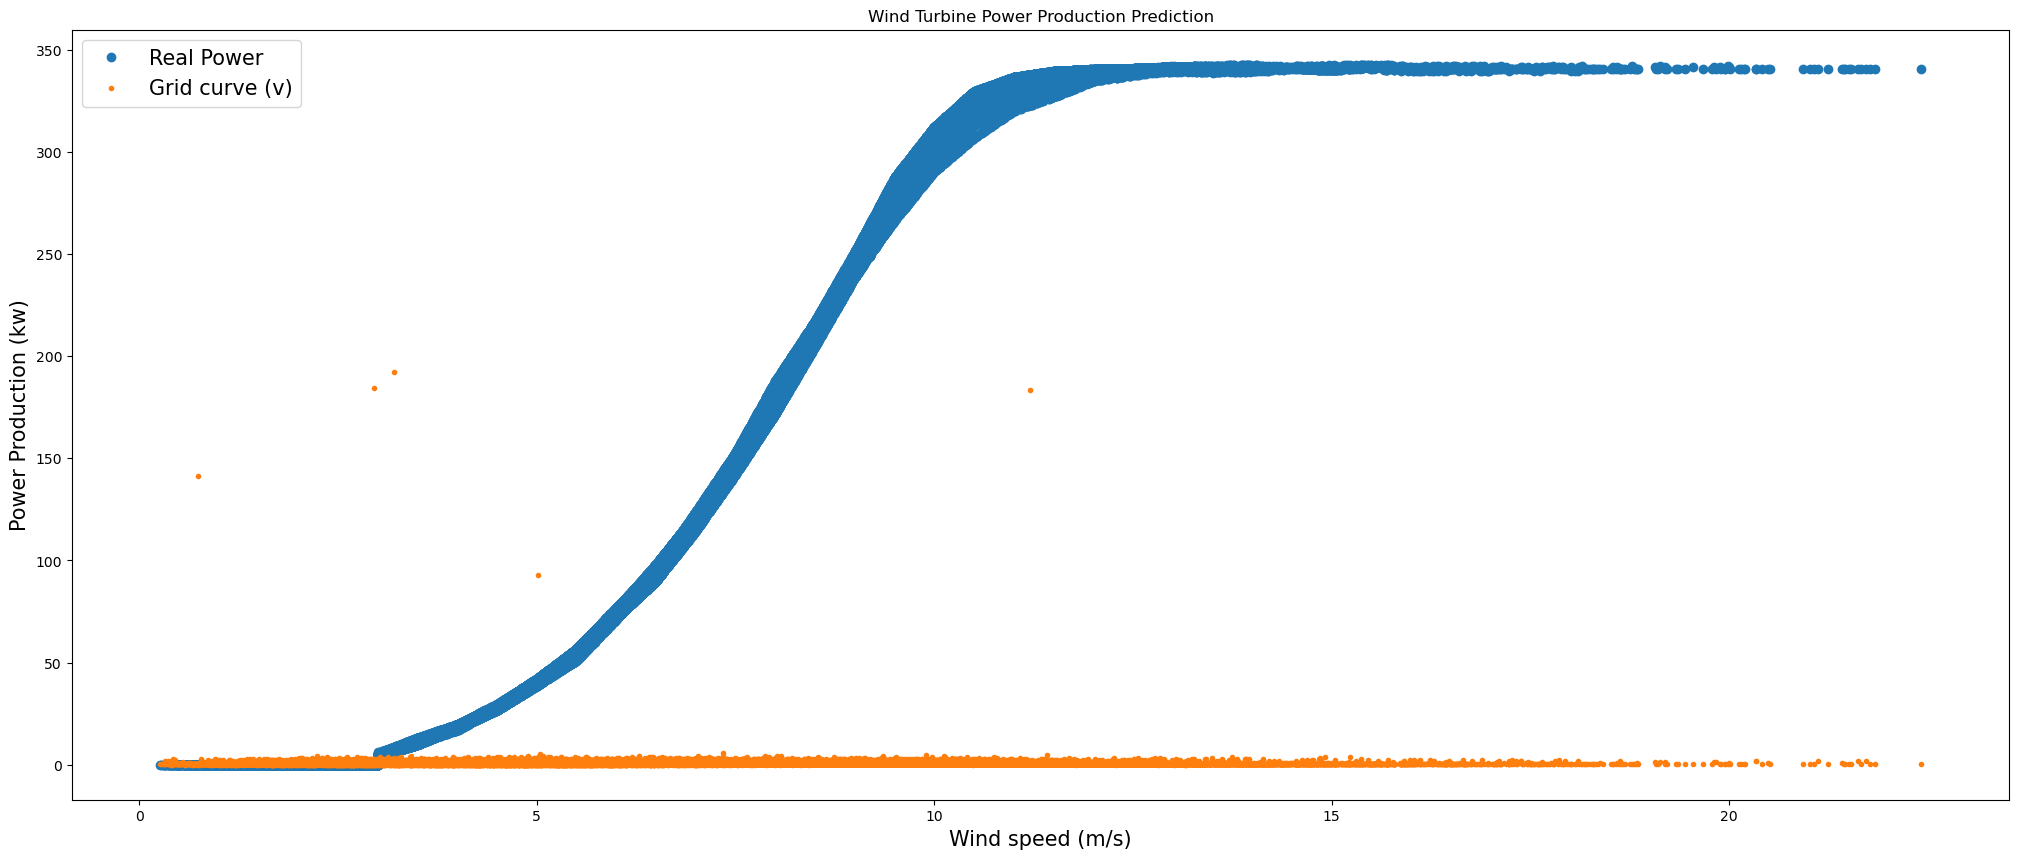

In [8]:
df =df
exp = df['Energy Theoretical (kWh)']
the = df['Grid voltage, Standard deviation (V)']
plt.figure(figsize=(25,10)) 
plt.plot(df['Wind speed (m/s)'], df['Energy Theoretical (kWh)'], 'o', label='Real Power')
plt.plot(df['Wind speed (m/s)'], df['Grid voltage, Standard deviation (V)'], '.', label='Grid curve (v)')
plt.xlabel('Wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

In [9]:
def outlier_remover(dat, prop, min, max):
    d = dat
    q_low = d[prop].quantile(min)
    q_hi  = d[prop].quantile(max)
    return d[(d[prop] < q_hi) & (d[prop] > q_low)]

In [10]:
#Sub-DataFrames
d = {}
step = 50
i = 1
for x in range(20, 3400, step):
    d[i] = df.iloc[((df['Turbine Power setpoint (kW)']>=x)&((df['Turbine Power setpoint (kW)']<x+step))).values]
    #print(d[i])
    i = i + 1
print("There are in total of {} DataFrames".format(i-1))

There are in total of 68 DataFrames


In [11]:
d[69] = df.iloc[(df['Turbine Power setpoint (kW)']>=3300).values]

In [12]:
# Remove outlier
for x in range(1, 70):
    if x <= 3:
        F = 0.95
    elif ((x > 3) and (x <= 10)):
        F = 0.9
    elif ((x > 10) and (x <= 20)):
        F = 0.92
    elif ((x > 20) and (x < 30)):
        F = 0.96
    else:
        F = 0.985
    d[x] = outlier_remover(d[x], 'Wind speed (m/s)', 0.0001, F)

In [13]:
df2 = pd.DataFrame() 

In [14]:
df_list = []

for infile in range(1, 70):
    df = d[infile]
    df_list.append(df)

df2 = pd.concat(df_list, ignore_index=True)

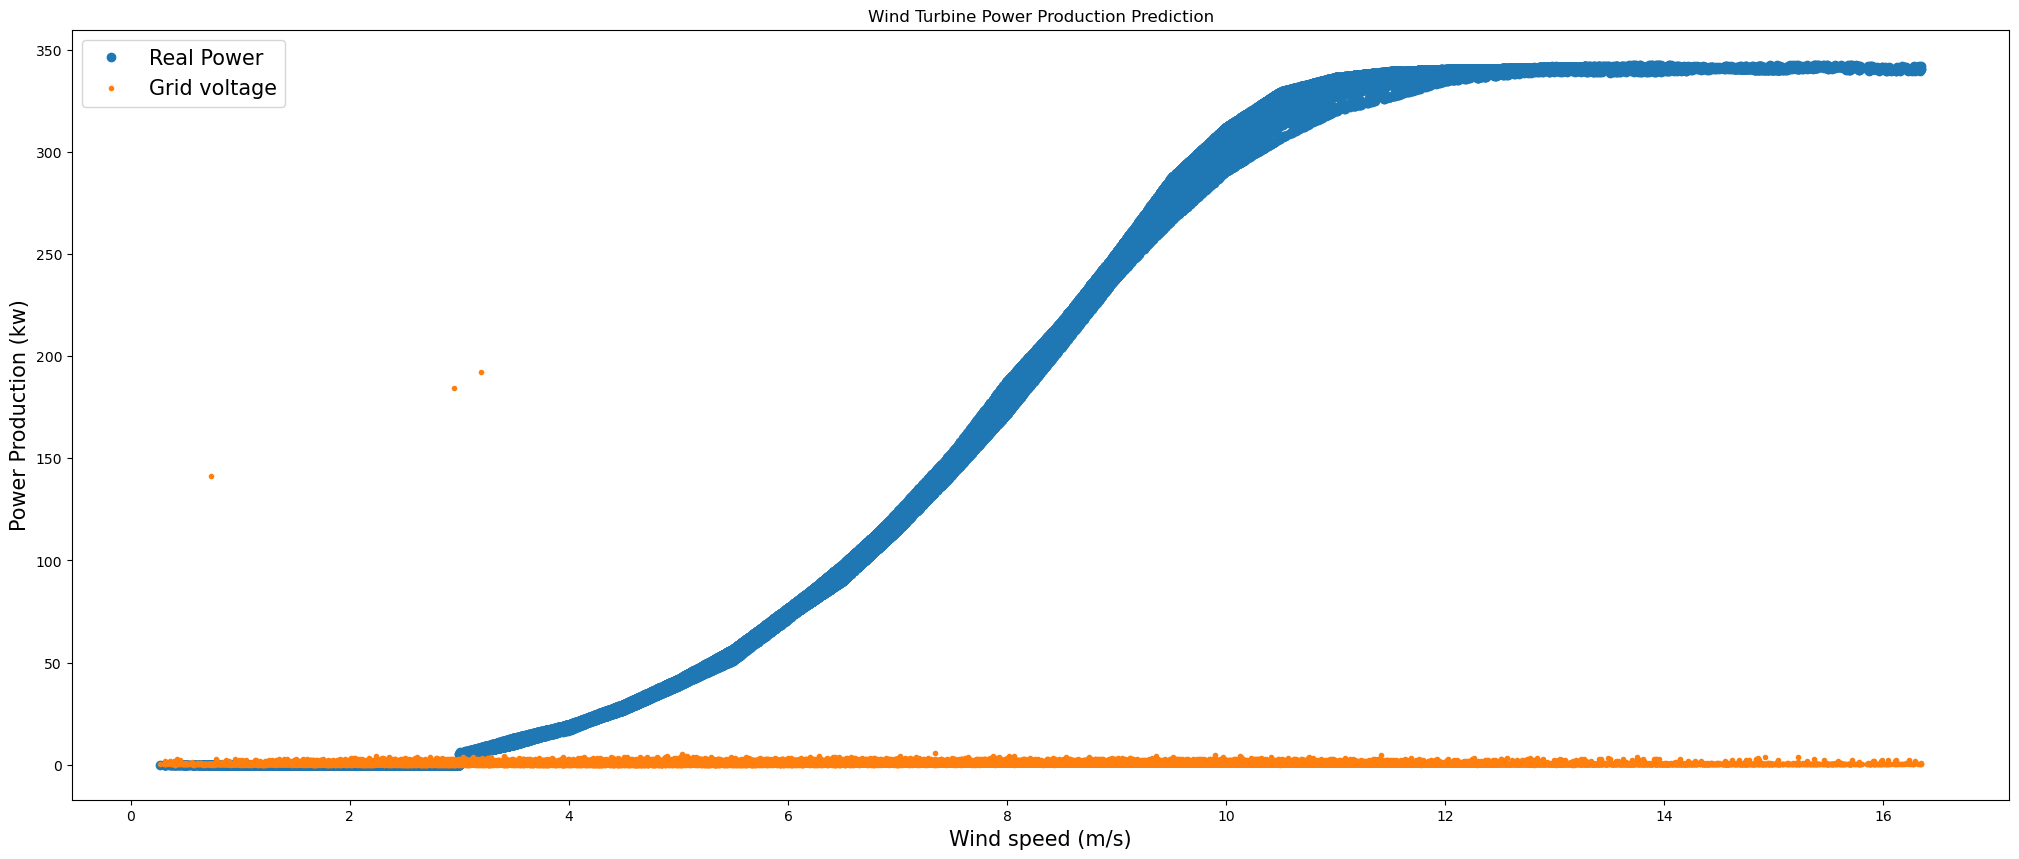

In [15]:
df = df2
exp = df['Energy Theoretical (kWh)']
the = df['Grid voltage, Standard deviation (V)']
plt.figure(figsize=(25,10)) 
plt.plot(df['Wind speed (m/s)'], df['Energy Theoretical (kWh)'], 'o', label='Real Power')
plt.plot(df['Wind speed (m/s)'], df['Grid voltage, Standard deviation (V)'], '.', label='Grid voltage')
plt.xlabel('Wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

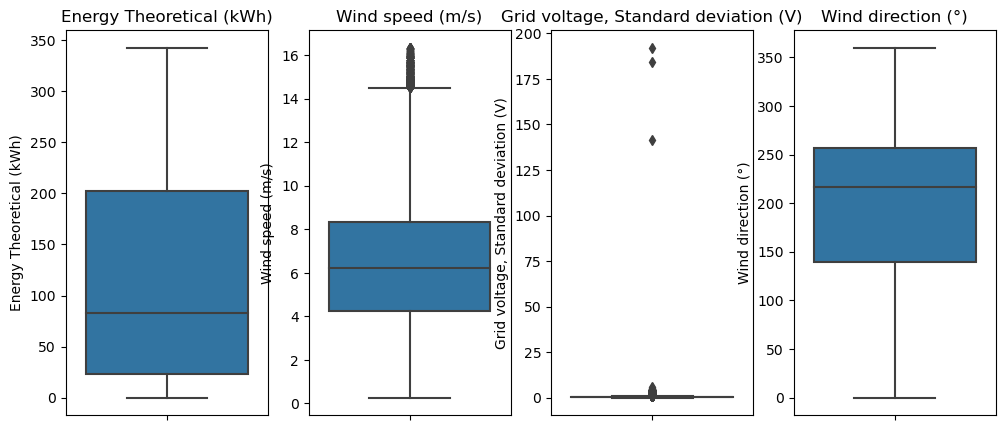

In [16]:
#box plot
df.columns = [col.replace('Â°', '°') for col in df.columns]

columns = ['Energy Theoretical (kWh)', 'Wind speed (m/s)', 'Grid voltage, Standard deviation (V)', 'Wind direction (°)']
i = 1
plt.figure(figsize=(12, 5))
for each in columns:
    plt.subplot(1, 4, i)
    sns.boxplot(data=df, y=each)
    plt.title(each)
    i += 1 

plt.show()

In [17]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
ftrain = ['Energy Theoretical (kWh)', 'Wind speed (m/s)', 'Wind direction (°)']

def Definedata():
    # define dataset
    data2 = df2[ftrain]
    X = data2.drop(columns=['Energy Theoretical (kWh)']).values
    y = data2['Energy Theoretical (kWh)'].values
    return X, y

In [19]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    TP = df2['Grid voltage, Standard deviation (V)']
    number = len(df2['Wind speed (m/s)'])
    aa=[x for x in df2['Wind speed (m/s)']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Real Power')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Power')
    plt.plot(aa, TP[:number], '.', label='Grid voltage')
    
    plt.xlabel('Wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.show()

		Error Table
Mean Absolute Error      :  3.236122695599413
Mean Squared  Error      :  30.439324954023856
Root Mean Squared  Error :  5.517184513320527
Accuracy on Traing set   :  0.9983787258567498
Accuracy on Testing set  :  0.9976350366963787


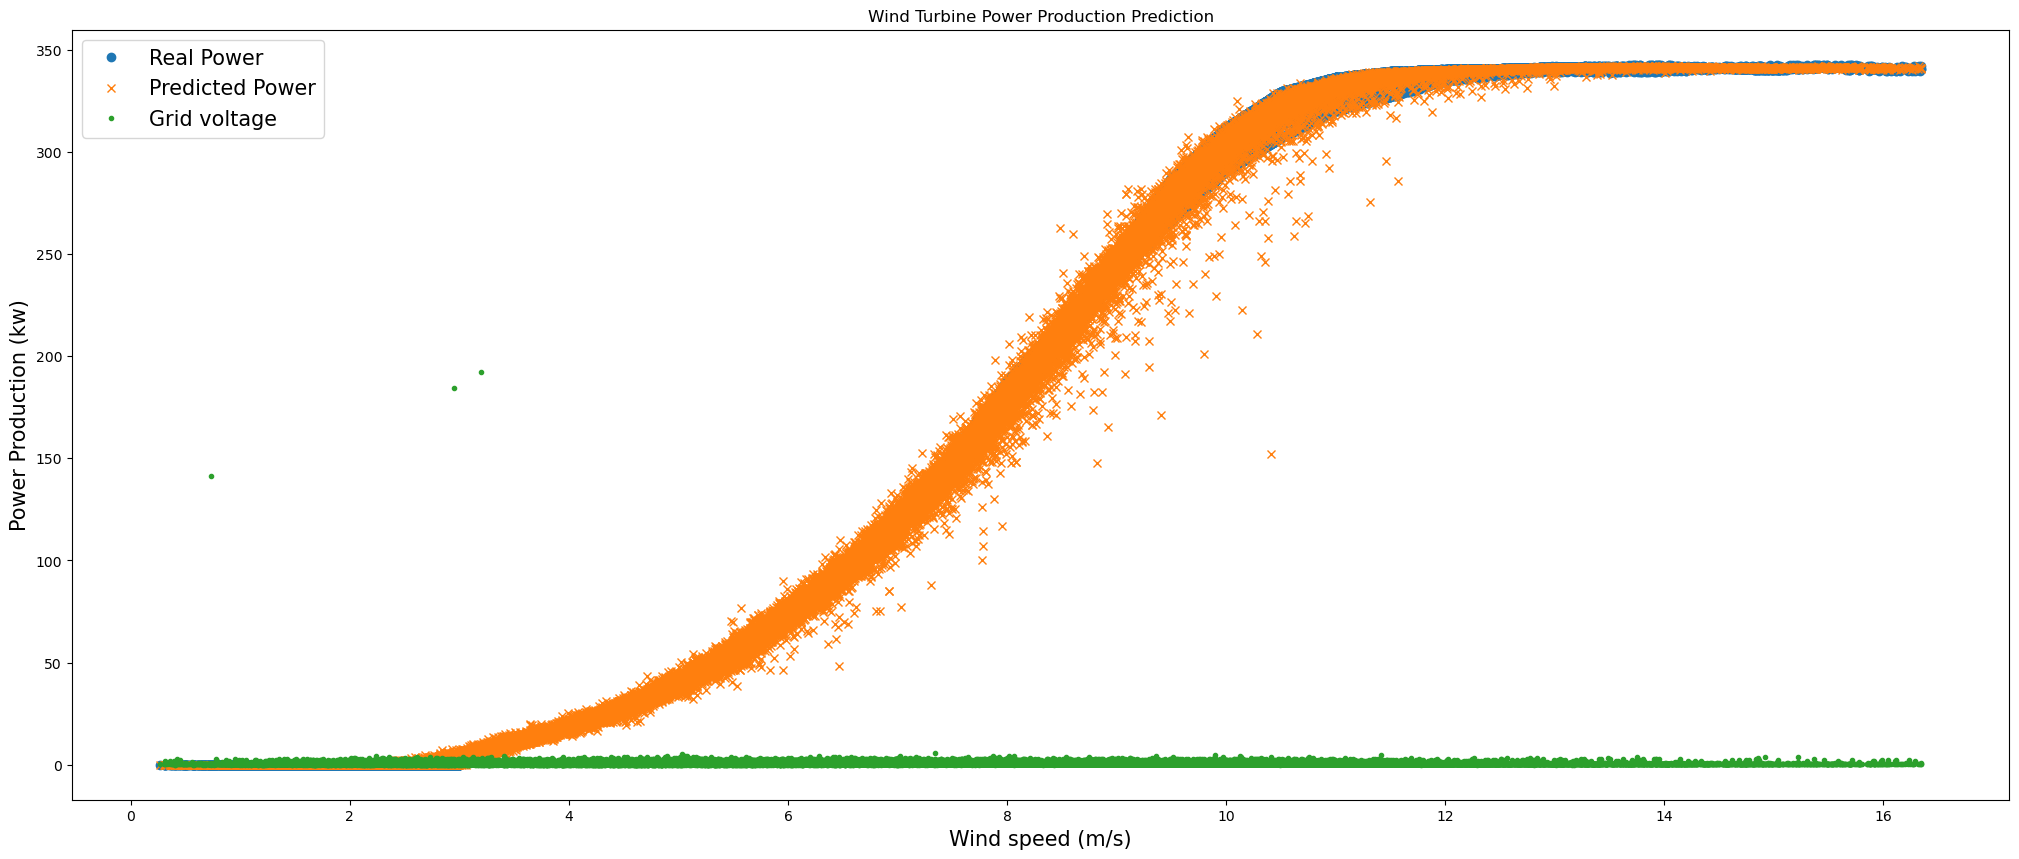

In [20]:
y_predicted, y_actual = Models(KNeighborsRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  2.1851399651254035
Mean Squared  Error      :  13.993105262451428
Root Mean Squared  Error :  3.7407359252493926
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9989128149031099


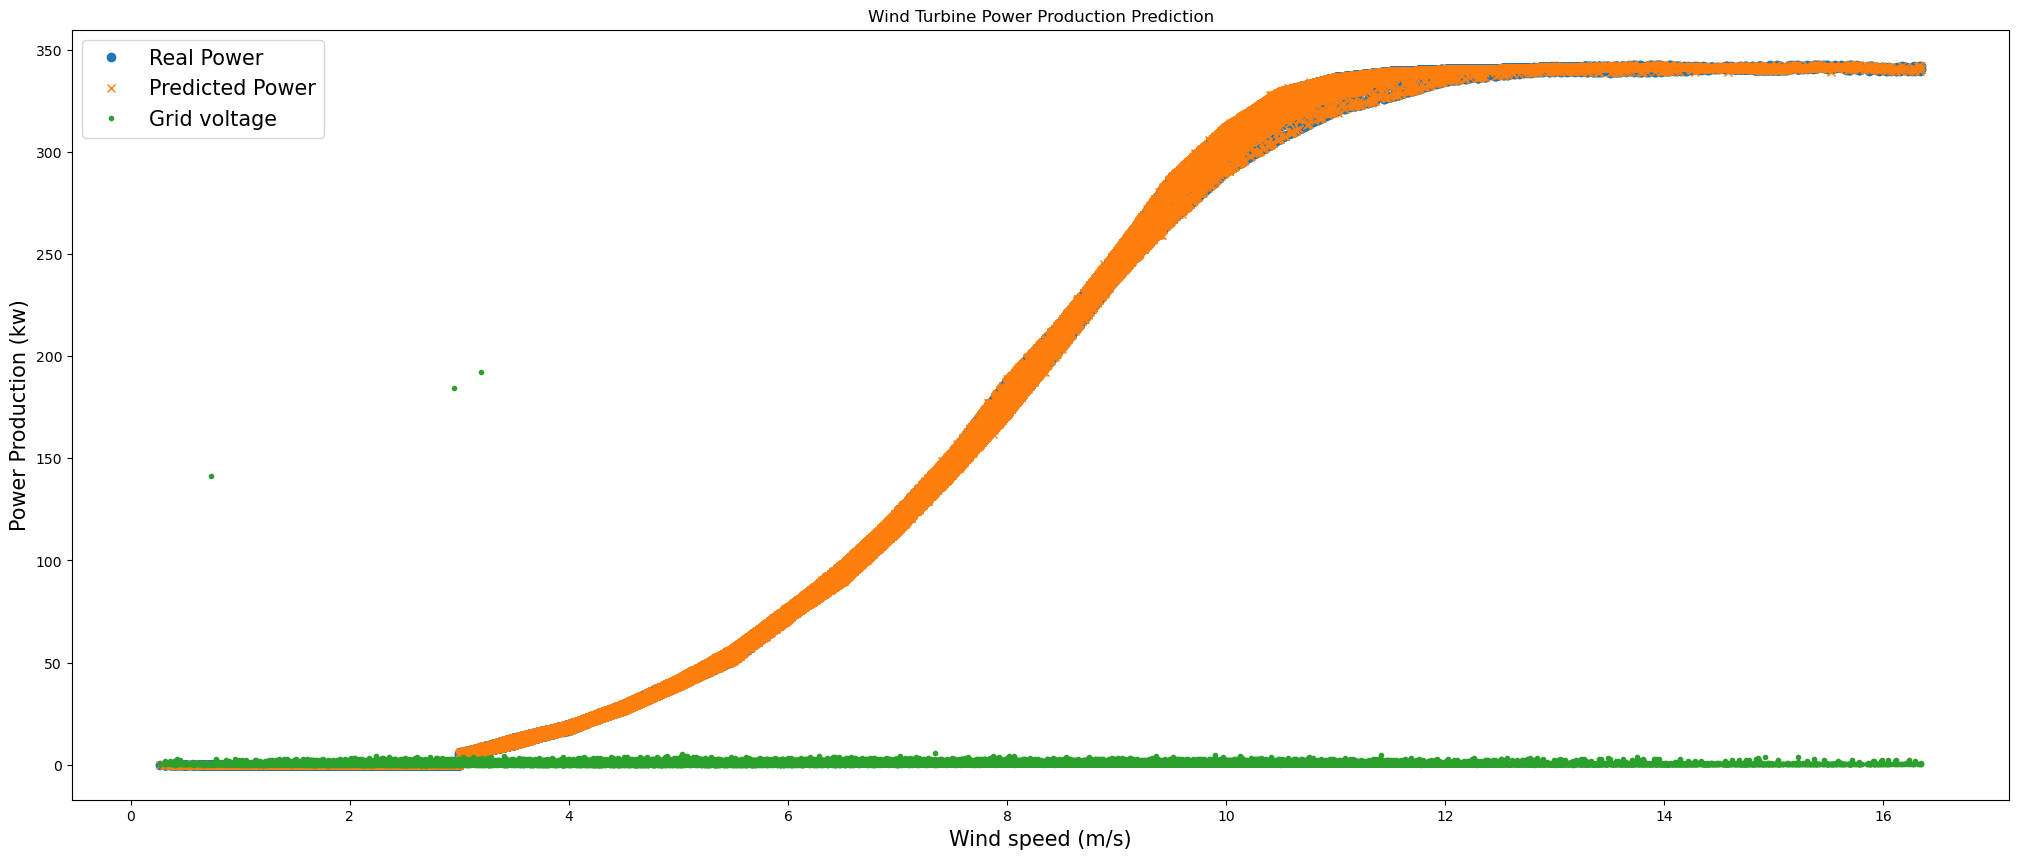

In [21]:
y_predicted, y_actual = Models(DecisionTreeRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  1.825637197089673
Mean Squared  Error      :  8.851660854634138
Root Mean Squared  Error :  2.975174088122263
Accuracy on Traing set   :  0.9999999999980744
Accuracy on Testing set  :  0.9993122760399933


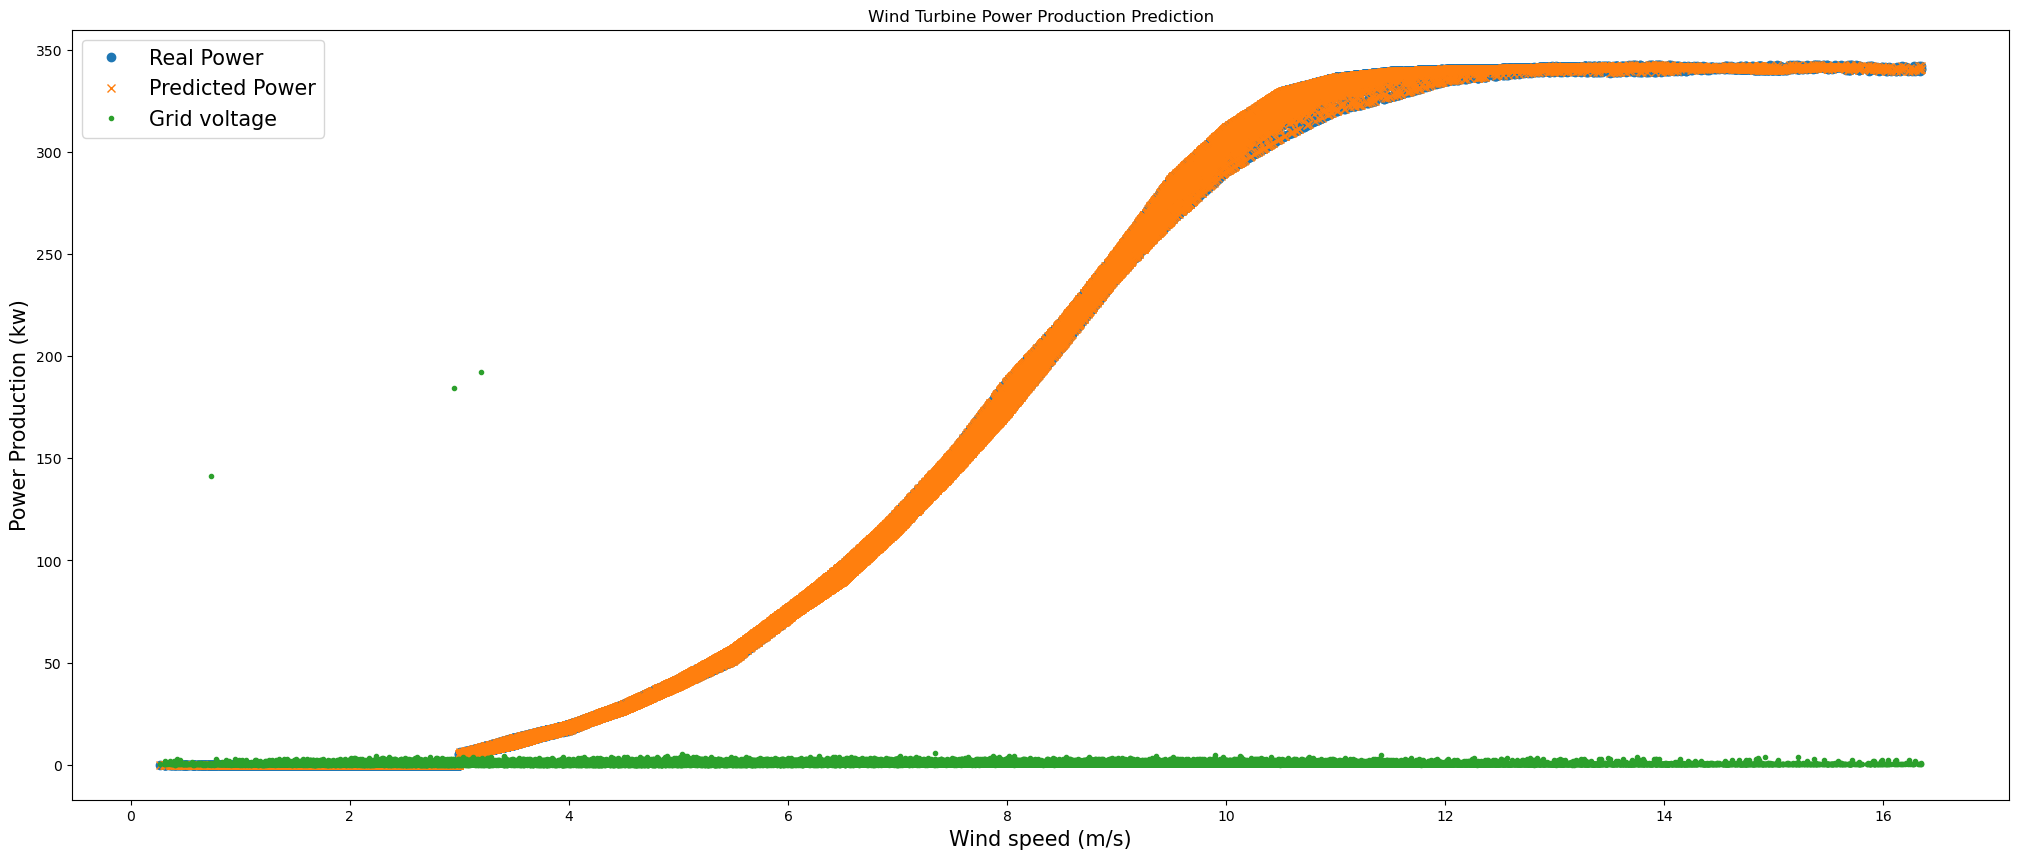

In [22]:
y_predicted, y_actual = Models(ExtraTreesRegressor())
Graph_prediction(y_actual, y_predicted)

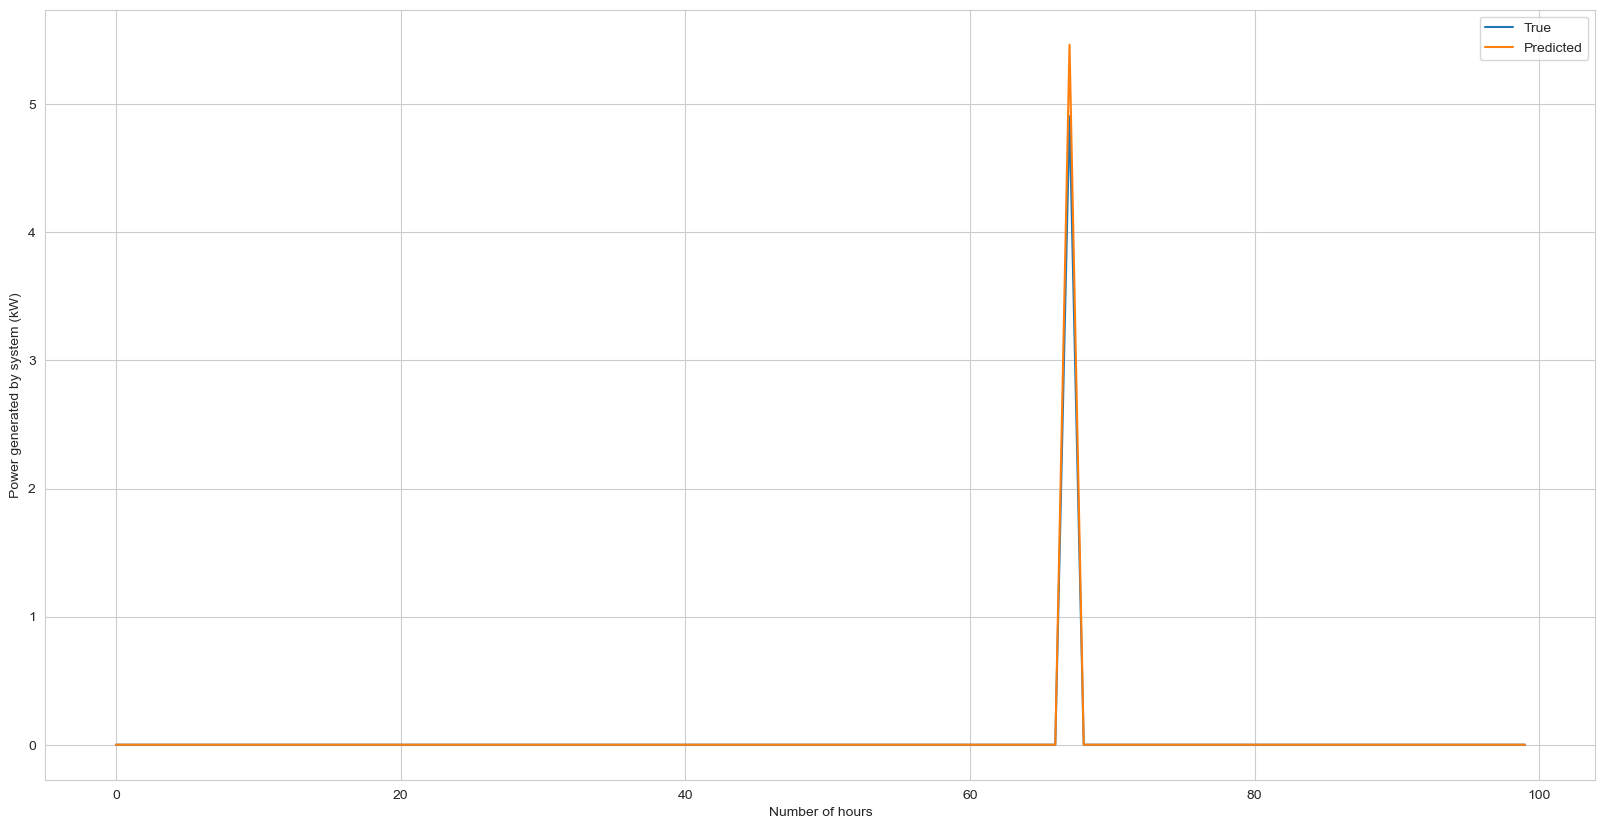

In [23]:
#line plot
#observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  1.8021192196699505
Mean Squared  Error      :  8.079766570743054
Root Mean Squared  Error :  2.842493020350807
Accuracy on Traing set   :  0.9999092826609425
Accuracy on Testing set  :  0.9993722478579766


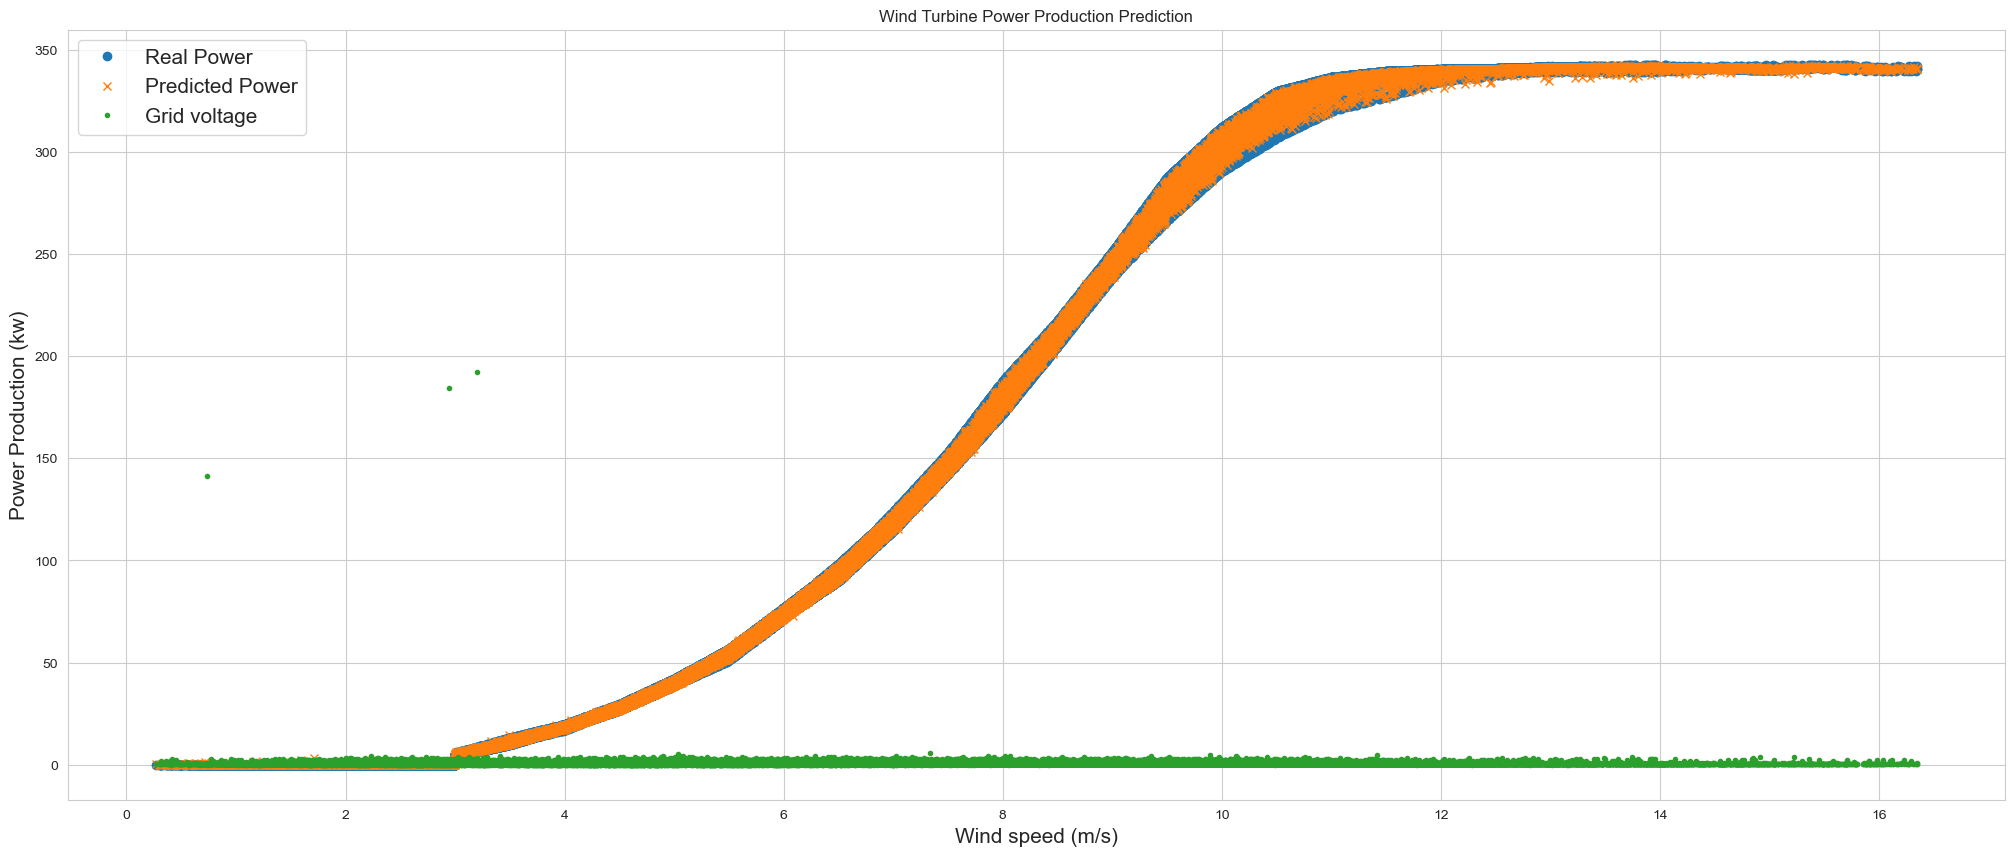

In [24]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=350,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  1.725780655156714
Mean Squared  Error      :  7.4062061252524565
Root Mean Squared  Error :  2.721434571187126
Accuracy on Traing set   :  0.9996174672150844
Accuracy on Testing set  :  0.9994245796931525


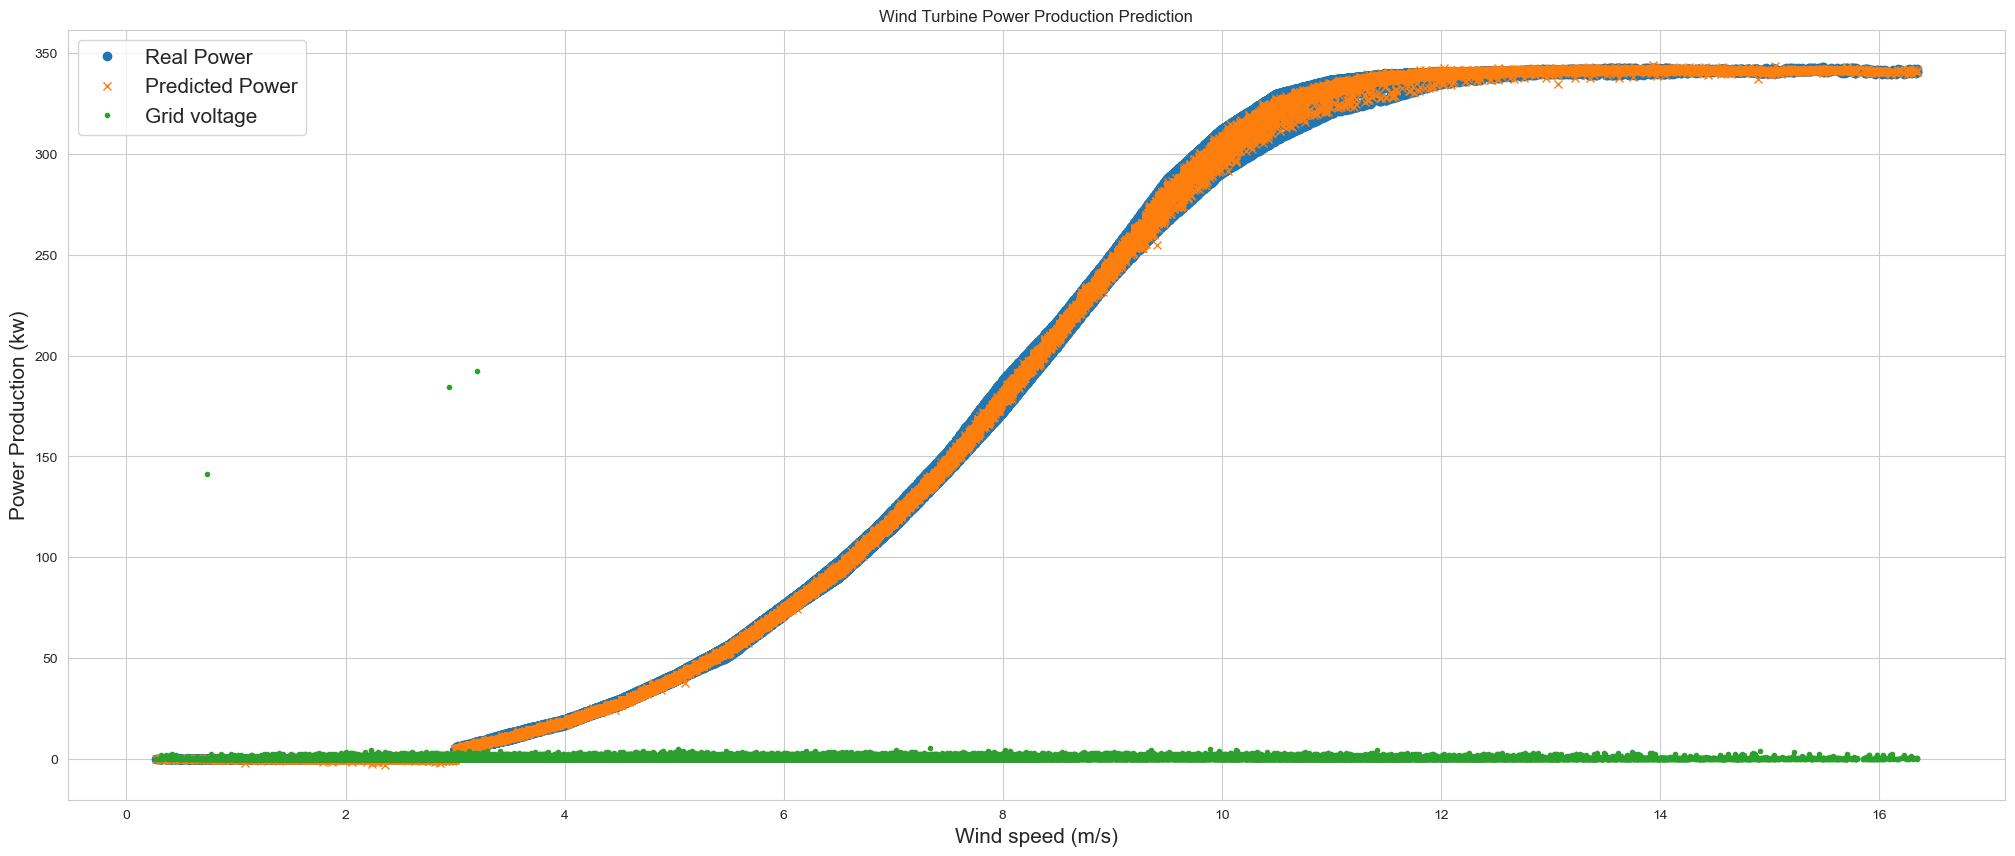

In [25]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=2000))
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  1.7676205662378952
Mean Squared  Error      :  8.20583215768684
Root Mean Squared  Error :  2.8645823705536624
Accuracy on Traing set   :  0.9999085640520118
Accuracy on Testing set  :  0.9993624532752314


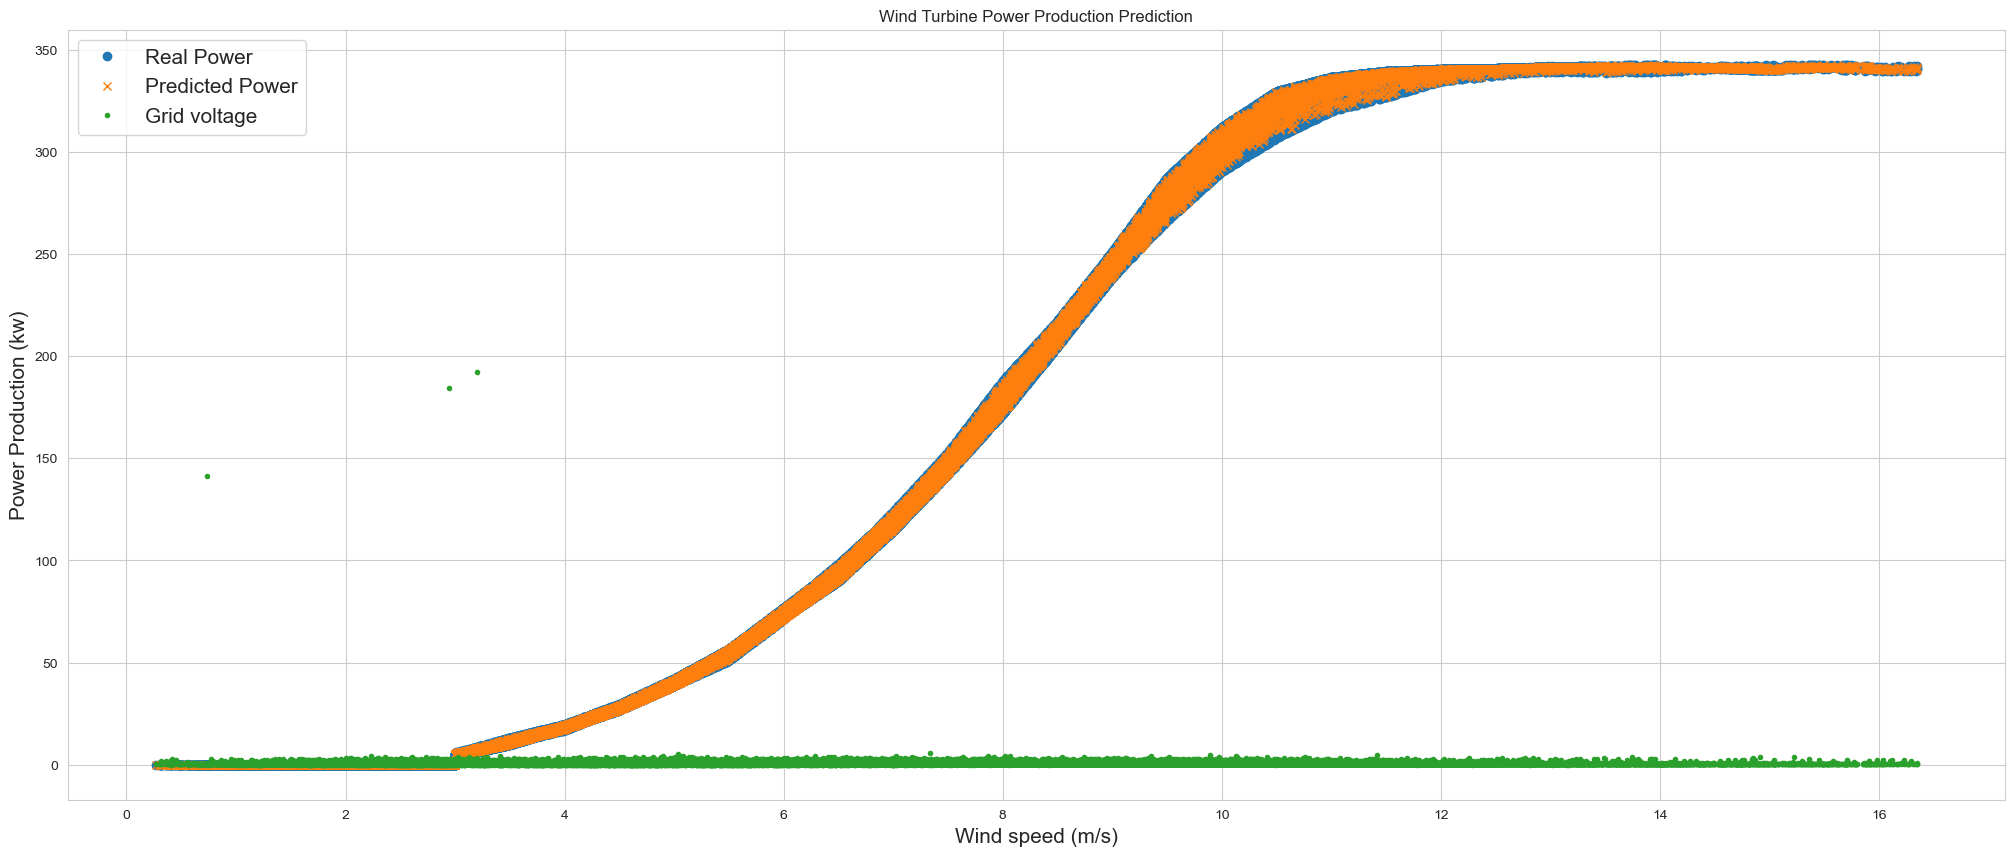

In [26]:
y_predicted, y_actual = Models(RandomForestRegressor())
Graph_prediction(y_actual, y_predicted)

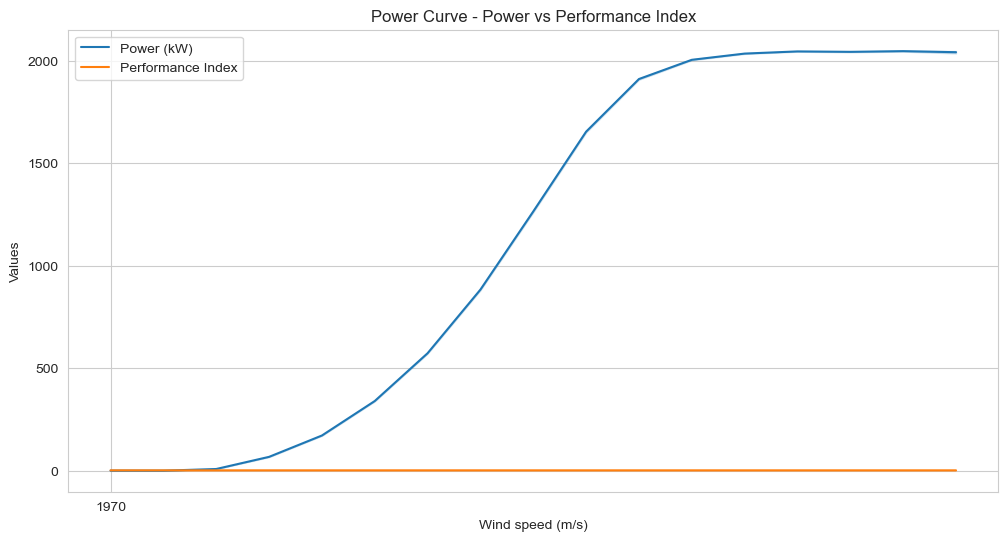

In [83]:
#power vs performance
# Power Curve
plt.figure(figsize=(12, 6))
sns.lineplot(x='Wind speed (m/s)', y='Power (kW)', data=df, label='Power (kW)')
sns.lineplot(x='Wind speed (m/s)', y='Performance Index', data=df, label='Performance Index')
plt.title('Power Curve - Power vs Performance Index')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

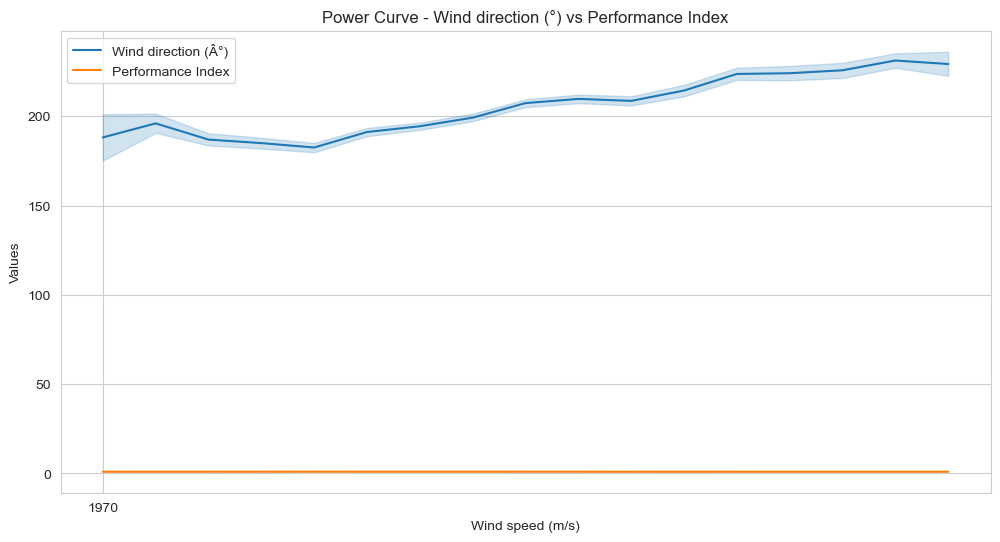

In [87]:
#direction vs performance
# Power Curve
plt.figure(figsize=(12, 6))
sns.lineplot(x='Wind speed (m/s)', y='Wind direction (°)', data=df, label='Wind direction (Â°)')
sns.lineplot(x='Wind speed (m/s)', y='Performance Index', data=df, label='Performance Index')
plt.title('Power Curve - Wind direction (°) vs Performance Index')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

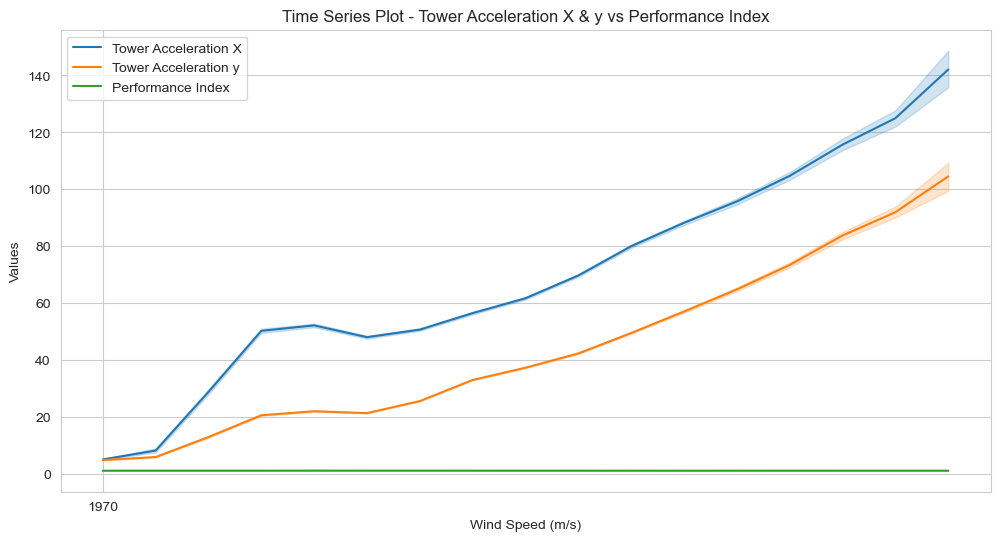

In [89]:
#tower accleration X & y vs performance
df['Wind speed (m/s)'] = pd.to_datetime(df['Wind speed (m/s)'])

# Time Series Plot combining both Tower Acceleration X and Y
plt.figure(figsize=(12, 6))
sns.lineplot(x='Wind speed (m/s)', y='Tower Acceleration X (mm/ss)', data=df, label='Tower Acceleration X')
sns.lineplot(x='Wind speed (m/s)', y='Tower Acceleration y (mm/ss)', data=df, label='Tower Acceleration y')
sns.lineplot(x='Wind speed (m/s)', y='Performance Index', data=df, label='Performance Index')
plt.title('Time Series Plot - Tower Acceleration X & y vs Performance Index')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

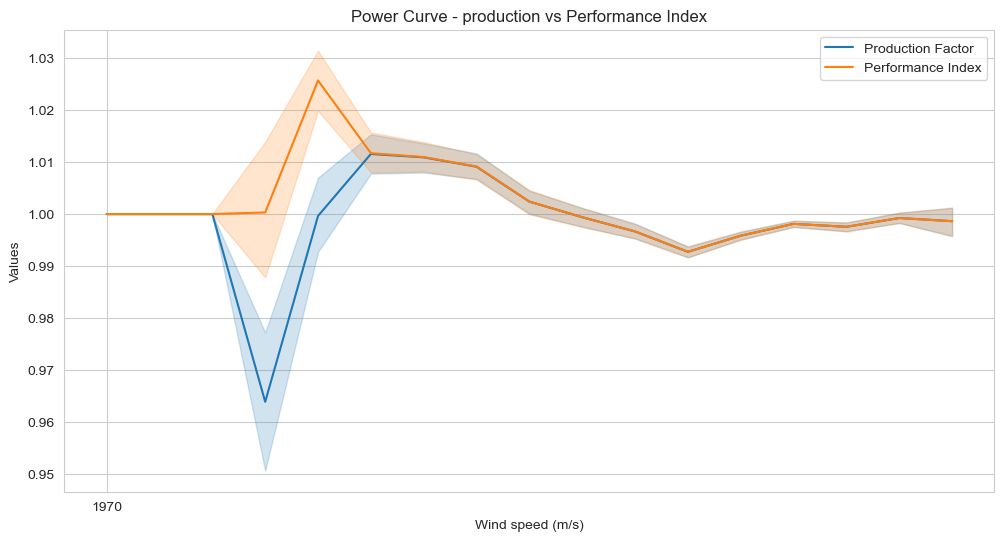

In [102]:
#production vs performance
# Power Curve
plt.figure(figsize=(12, 6))
sns.lineplot(x='Wind speed (m/s)', y='Production Factor', data=df, label='Production Factor')
sns.lineplot(x='Wind speed (m/s)', y='Performance Index', data=df, label='Performance Index')
plt.title('Power Curve - production vs Performance Index')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

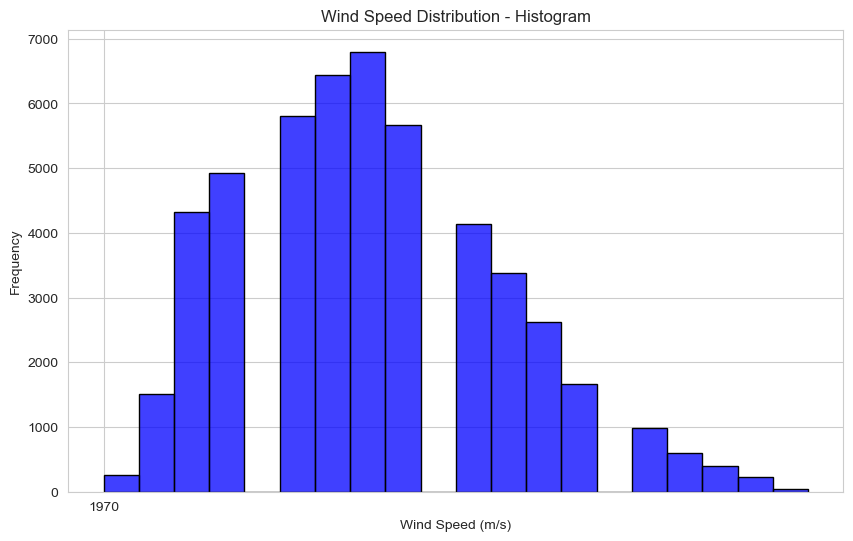

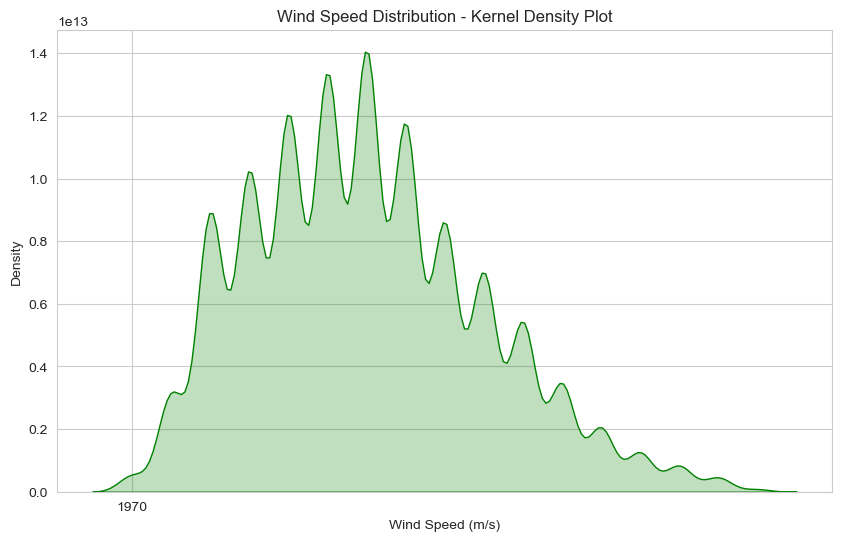

In [91]:
#speed distribution
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind speed (m/s)'], bins=20, kde=False, color='blue', edgecolor='black')
plt.title('Wind Speed Distribution - Histogram')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Wind speed (m/s)'], color='green', fill=True)
plt.title('Wind Speed Distribution - Kernel Density Plot')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


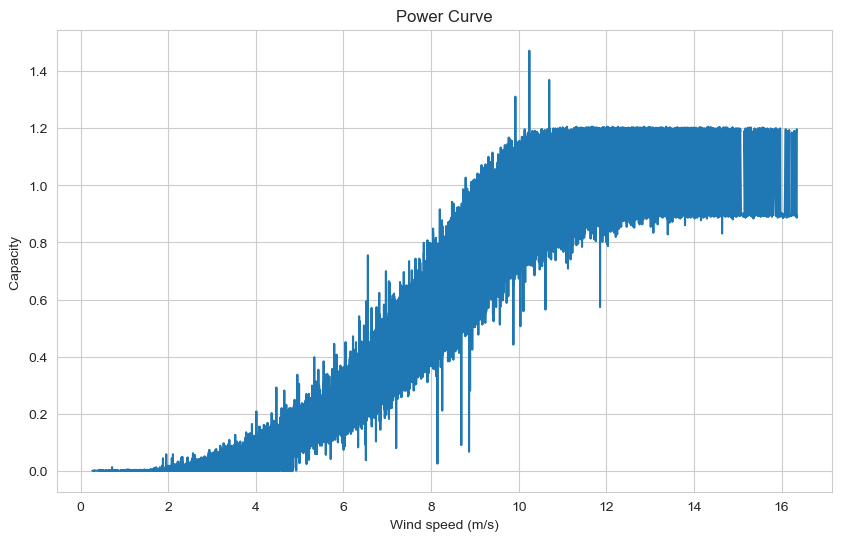

In [76]:
#capacity vs wind speed
# Power Curve
plt.figure(figsize=(10, 6))
sns.lineplot(x='Wind speed (m/s)', y='Capacity factor', data=df)
plt.title('Power Curve')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Capacity ')
plt.grid(True)
plt.show()

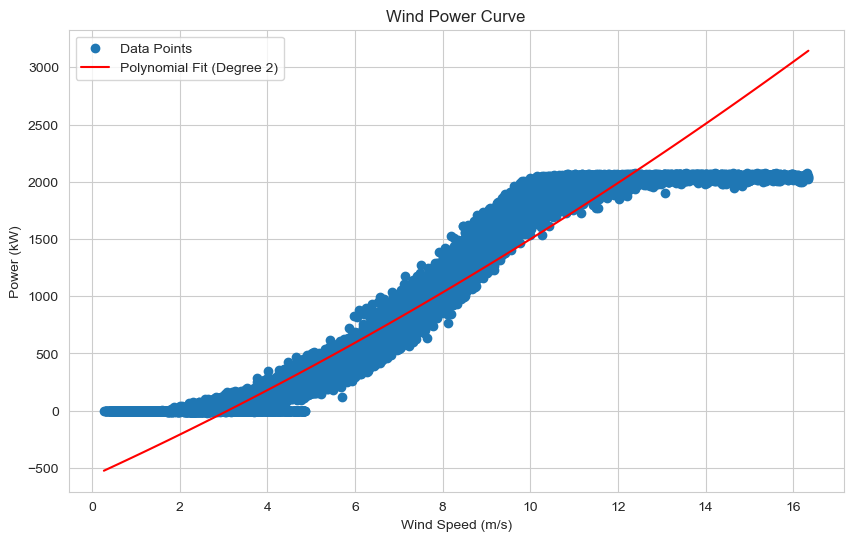

In [59]:
#power vs speed
# Assuming 'timestamp' is the datetime column in your DataFrame
df['# Date and time'] = pd.to_datetime(df['# Date and time'])

# Selecting relevant columns
selected_columns = ['Wind speed (m/s)', 'Power (kW)']
power_curve_df = df[selected_columns].dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(power_curve_df['Wind speed (m/s)'], power_curve_df['Power (kW)'], label='Data Points')

# Fit a polynomial curve (you can adjust the degree)
degree = 2
coefficients = np.polyfit(power_curve_df['Wind speed (m/s)'], power_curve_df['Power (kW)'], degree)
poly = np.poly1d(coefficients)
x_range = np.linspace(power_curve_df['Wind speed (m/s)'].min(), power_curve_df['Wind speed (m/s)'].max(), 100)
plt.plot(x_range, poly(x_range), color='red', label=f'Polynomial Fit (Degree {degree})')

plt.title('Wind Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

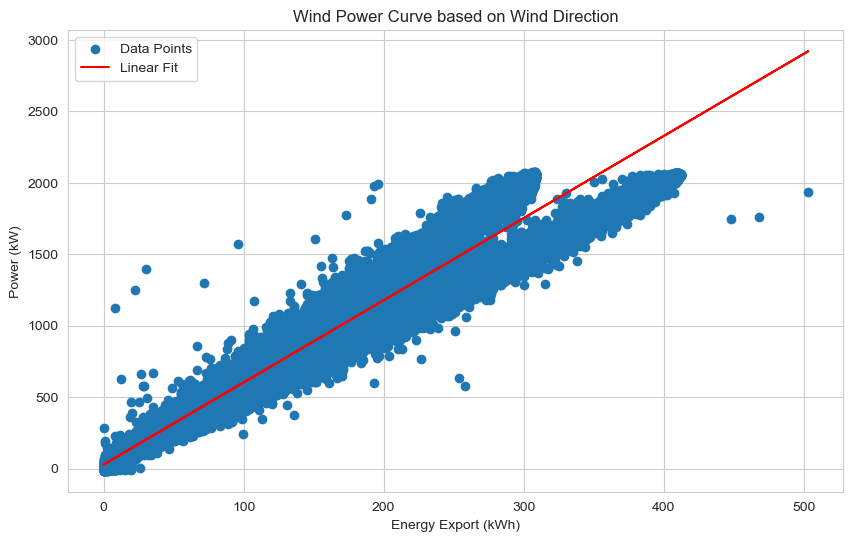

In [64]:
#power vs energy
# Assuming 'timestamp' is the datetime column in your DataFrame
df['# Date and time'] = pd.to_datetime(df['# Date and time'])

# Selecting relevant columns
selected_columns = ['Energy Export (kWh)', 'Power (kW)']
power_curve_df = df[selected_columns].dropna()

# Extracting features (Wind direction) and target (Power)
X = power_curve_df[['Energy Export (kWh)']]
y = power_curve_df['Power (kW)']

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting values using the model
y_pred = model.predict(X)

# Plotting the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Fit')

plt.title('Wind Power Curve based on Wind Direction')
plt.xlabel('Energy Export (kWh)')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

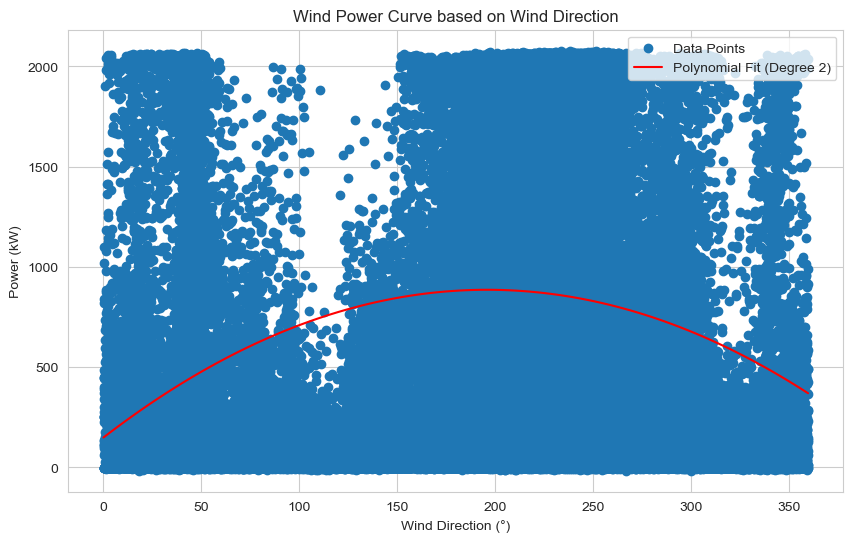

In [69]:
#power vs wind direction
# Assuming 'timestamp' is the datetime column in your DataFrame
df['# Date and time'] = pd.to_datetime(df['# Date and time'])

# Selecting relevant columns
selected_columns = ['Wind direction (°)', 'Power (kW)']
power_curve_df = df[selected_columns].dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(power_curve_df['Wind direction (°)'], power_curve_df['Power (kW)'], label='Data Points')

# Fit a polynomial curve (you can adjust the degree)
degree = 2
coefficients = np.polyfit(power_curve_df['Wind direction (°)'], power_curve_df['Power (kW)'], degree)
poly = np.poly1d(coefficients)
x_range = np.linspace(power_curve_df['Wind direction (°)'].min(), power_curve_df['Wind direction (°)'].max(), 100)
plt.plot(x_range, poly(x_range), color='red', label=f'Polynomial Fit (Degree {degree})')

plt.title('Wind Power Curve based on Wind Direction')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

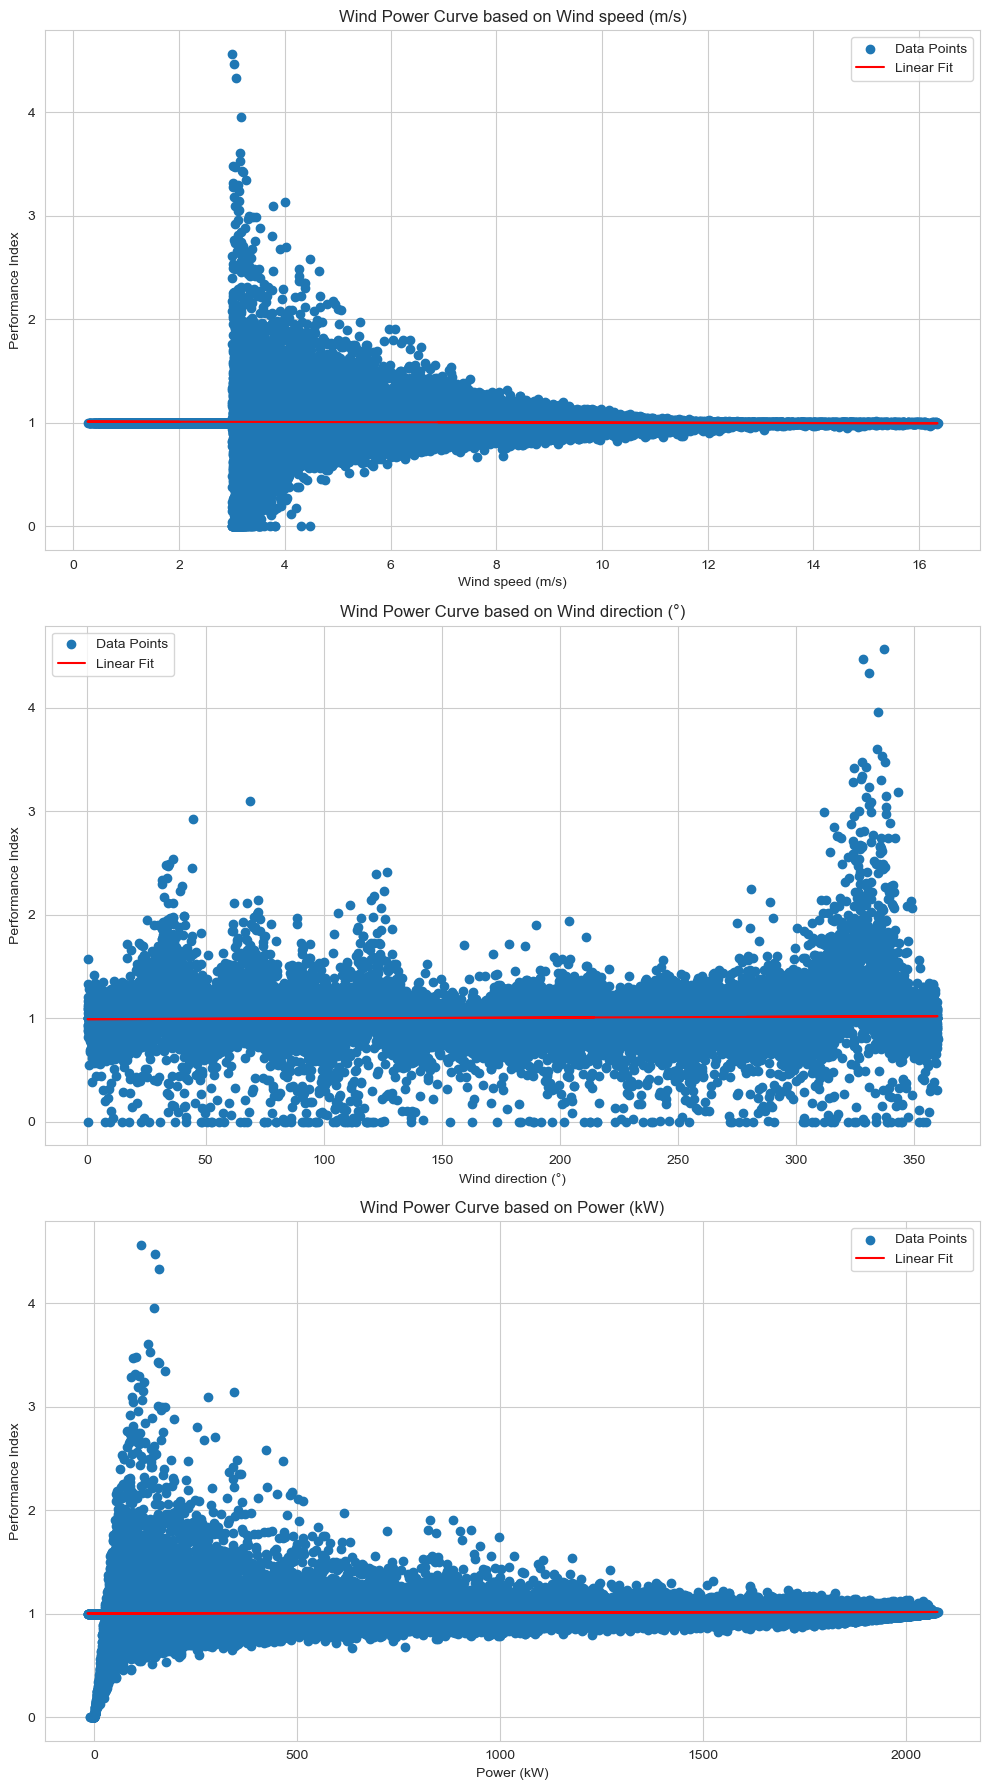

In [67]:
#date vs columns
from sklearn.linear_model import LinearRegression

# Assuming 'timestamp' is the datetime column in your DataFrame
df['# Date and time'] = pd.to_datetime(df['# Date and time'])

# Define a list of selected columns for power curves
selected_columns = ['Wind speed (m/s)', 'Wind direction (°)', 'Power (kW)']

# Set up subplots based on the number of selected columns
num_columns = len(selected_columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(10, 6*num_columns))

# Iterate through selected columns
for i, column in enumerate(selected_columns):
    # Select relevant columns and dropna
    power_curve_df = df[[column, 'Performance Index']].dropna()

    # Extracting features (selected column) and target (Power)
    X = power_curve_df[[column]]
    y = power_curve_df['Performance Index']

    # Fitting a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predicting values using the model
    y_pred = model.predict(X)

    # Plotting the linear fit in a subplot
    axes[i].scatter(X, y, label='Data Points')
    axes[i].plot(X, y_pred, color='red', label='Linear Fit')
    axes[i].set_title(f'Wind Power Curve based on {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Performance Index')
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 239. PiB for an array with shape (33669394530241516,) and data type float64

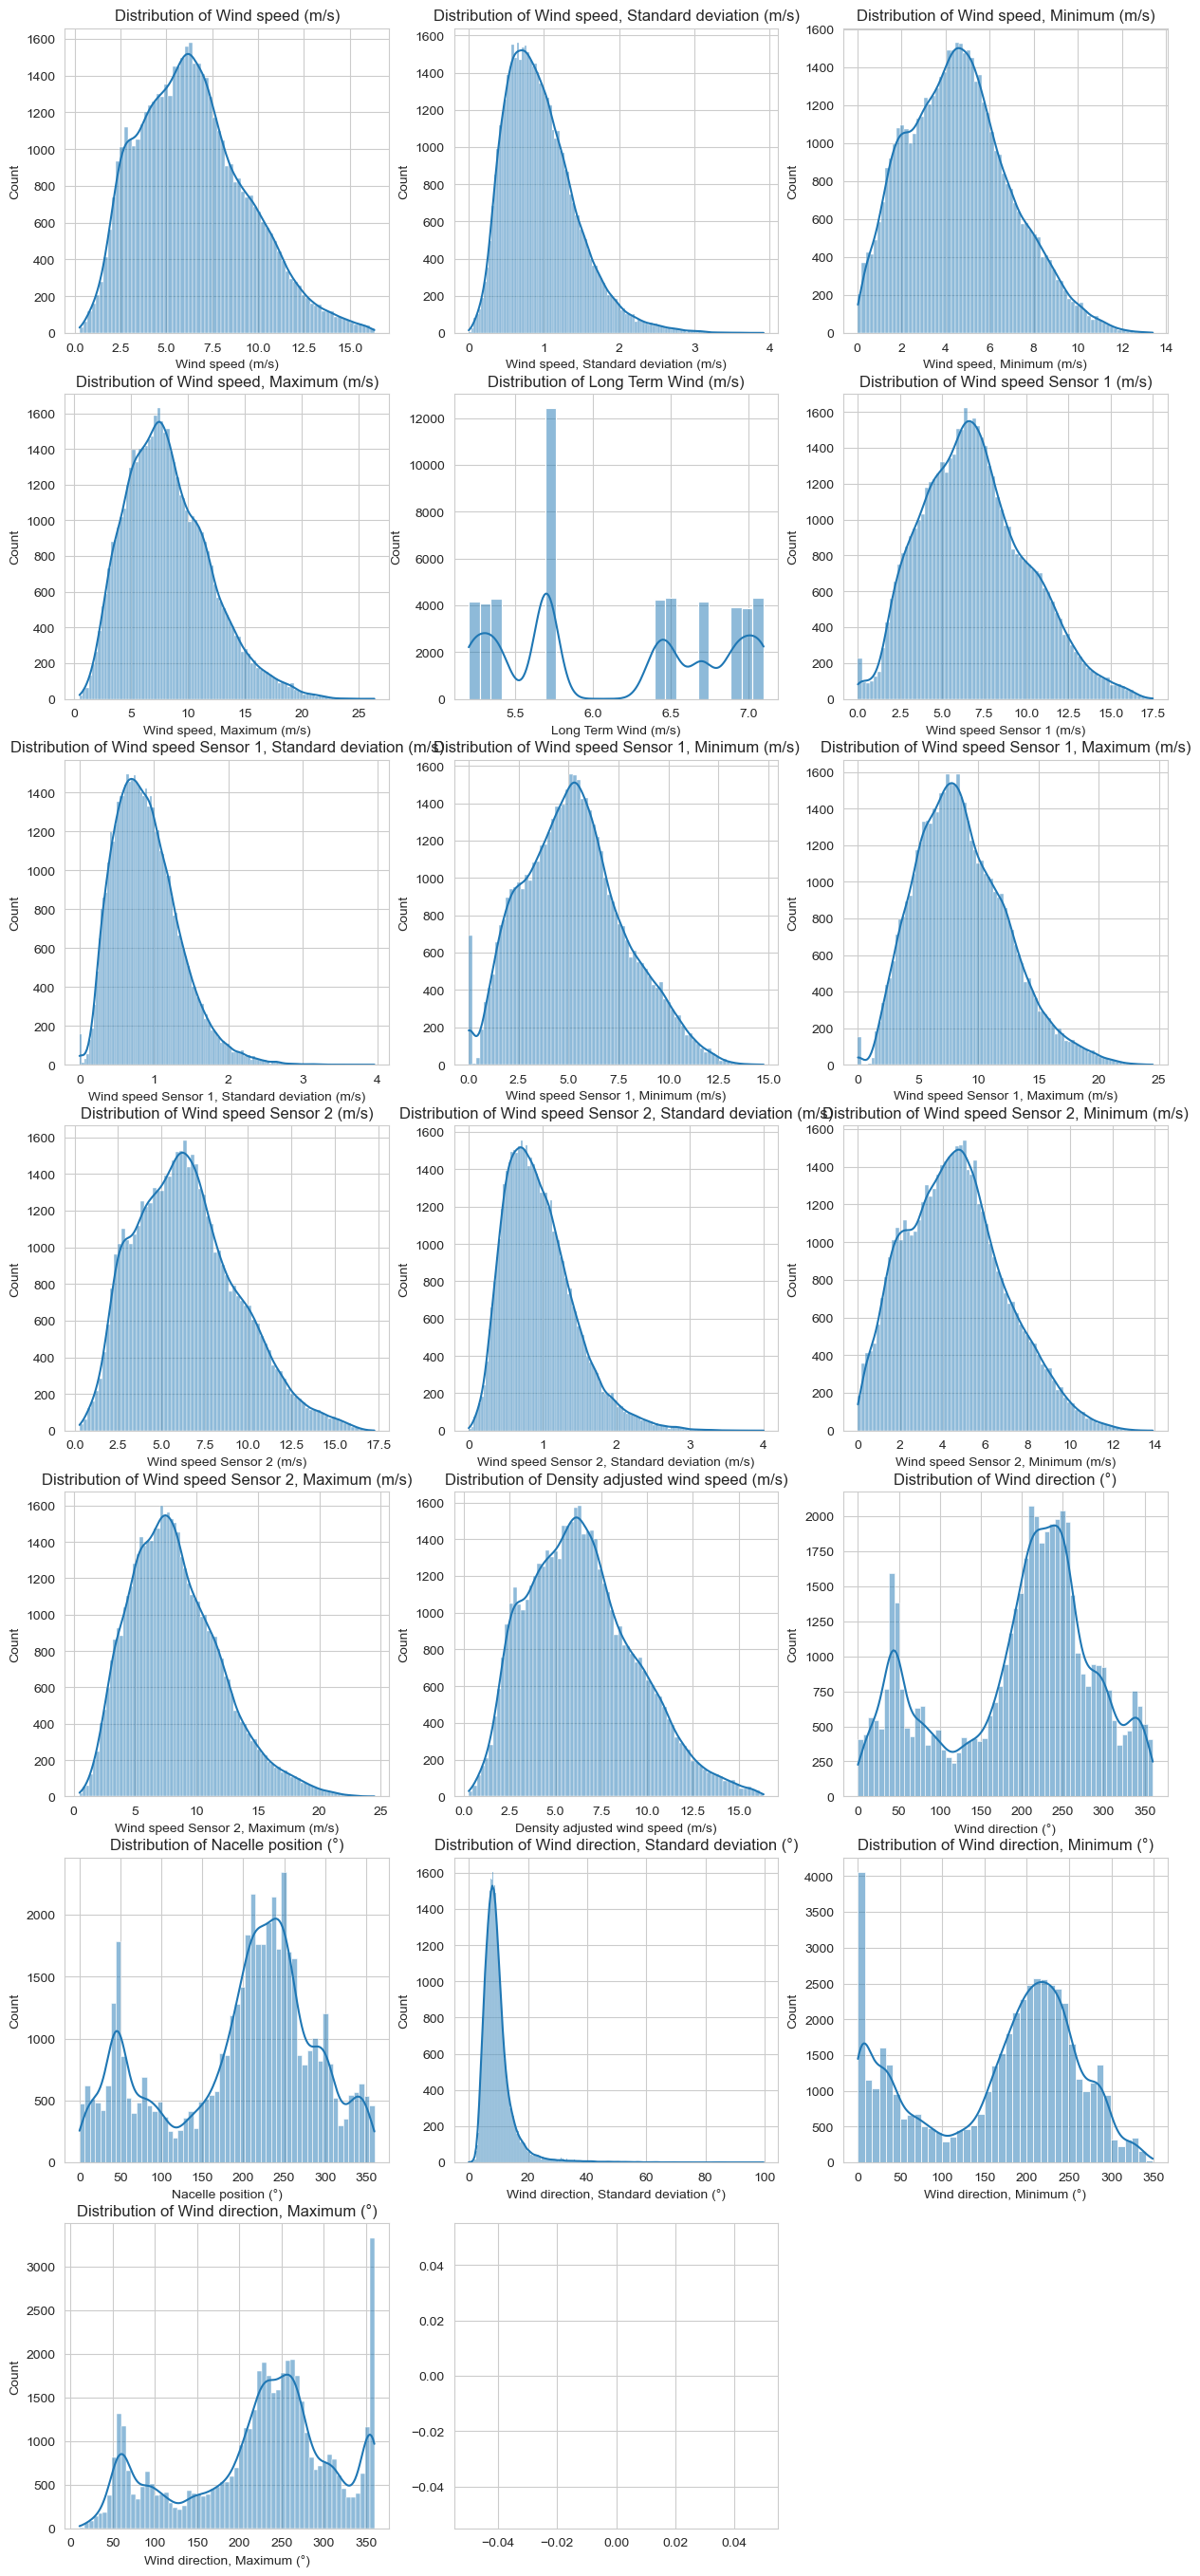

In [128]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_count = len(num_cols)
num_cols_per_row = 3  

plt.figure(figsize=(15, 5 * (num_cols_count // num_cols_per_row + 1)))
for i, column in enumerate(num_cols, 1):
    plt.subplot((num_cols_count // num_cols_per_row) + 1, num_cols_per_row, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

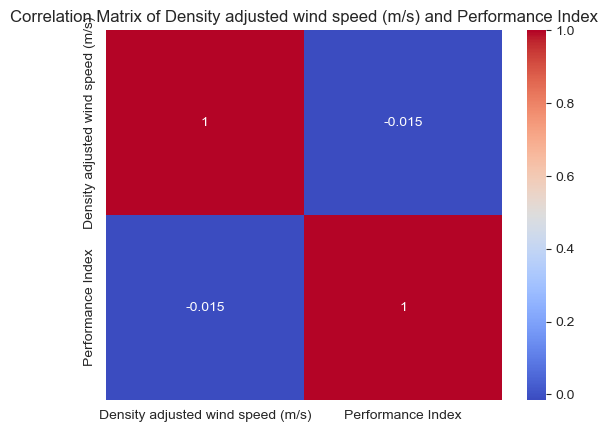

In [34]:
#cor matrix
selected_column1 = 'Density adjusted wind speed (m/s)'
selected_column2 = 'Performance Index'

# columns
subset_df = df[[selected_column1, selected_column2]]

# Correlation matrix 
corr_mat_all = subset_df.corr()

# Plotting
sns.heatmap(corr_mat_all, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix of {selected_column1} and {selected_column2}')
plt.show()

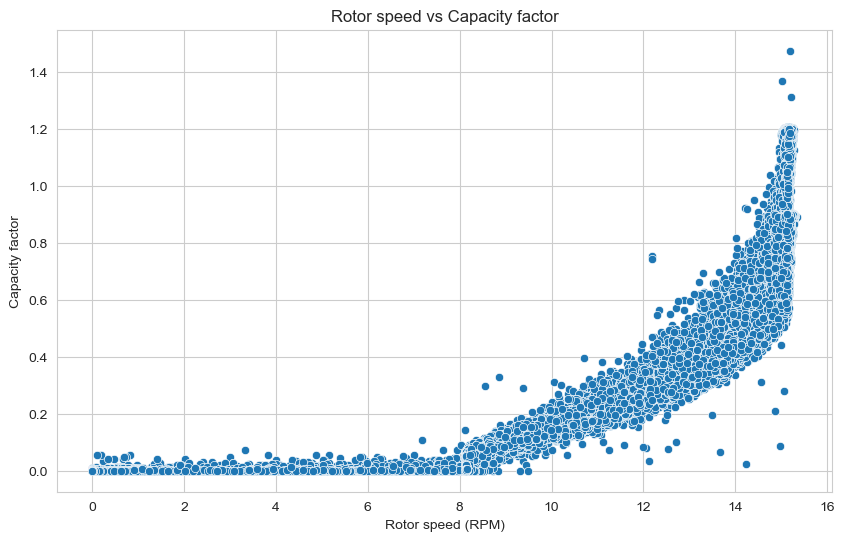

In [119]:
#Rotor speed vsCapacity factor
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rotor speed (RPM)', y='Capacity factor', data=df)
plt.title('Rotor speed vs Capacity factor')
plt.xlabel('Rotor speed (RPM)')
plt.ylabel('Capacity factor')
plt.grid(True)
plt.show()

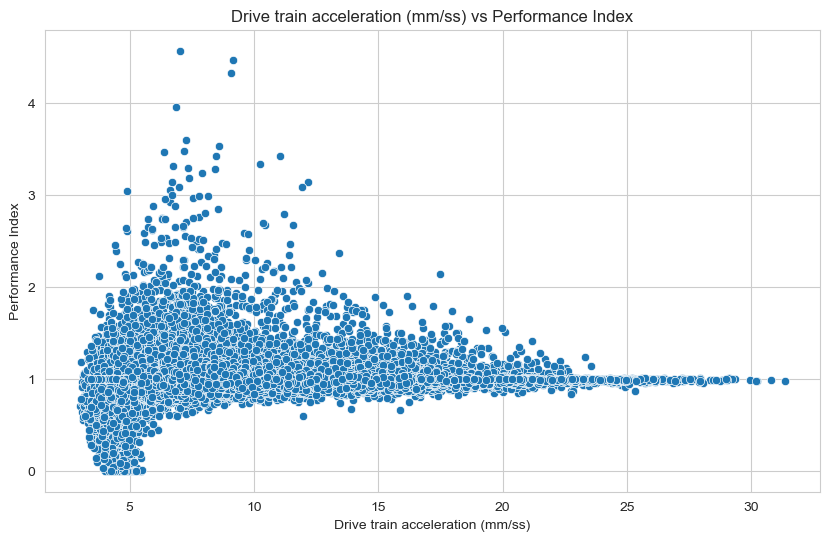

In [123]:
#Drive train acceleration (mm/ss) vs Performance Index
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Drive train acceleration (mm/ss)', y='Performance Index', data=df)
plt.title('Drive train acceleration (mm/ss) vs Performance Index')
plt.xlabel('Drive train acceleration (mm/ss)')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

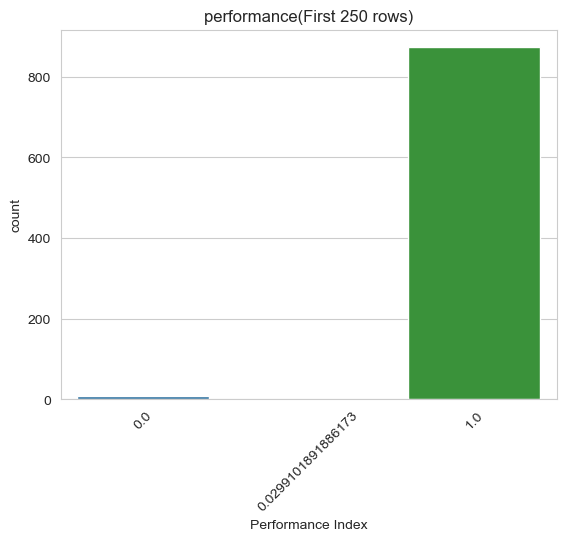

In [109]:
column_time = 'Performance Index'
#first 1000 rows
sns.countplot(x=column_time, data=df.head(1000))
plt.title('performance(First 1000 rows)')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


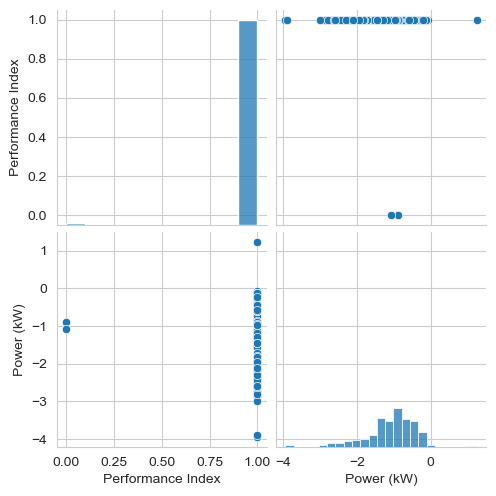

In [111]:
subset_columns = ['# Date and time', 'Performance Index', 'Power (kW)']
sns.pairplot(df.head(300)[subset_columns])
plt.show()

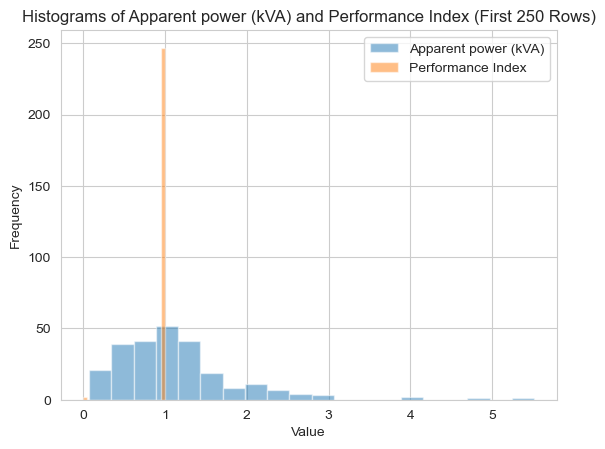

In [32]:
selected_column1 = 'Apparent power (kVA)'
selected_column2 = 'Performance Index'  

#first 250 rows
plt.hist(df[selected_column1].head(250), bins=20, alpha=0.5, label=selected_column1)
plt.hist(df[selected_column2].head(250), bins=20, alpha=0.5, label=selected_column2)

plt.title(f'Histograms of {selected_column1} and {selected_column2} (First 250 Rows)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [92]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.3 kB ? eta -:--:--
   ------------------------------------ --- 92.2/100.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 100.3/100.3 kB 1.4 MB/s eta 0:00:00


In [94]:
#layout using folium
import folium
# Create a Folium map 
map_center = [df['Wind direction (°)'].mean(), df['Nacelle position (°)'].mean()]
wind_farm_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each turbine
for index, row in df.iterrows():
    turbine_location = [row['Wind direction (°)'], row['Nacelle position (°)']]
    turbine_popup = f"Turbine {index+1}"  # Customize the popup content if needed
    folium.Marker(location=turbine_location, popup=turbine_popup).add_to(wind_farm_map)

# Save the map as an HTML file or display it
wind_farm_map.save("wind_farm_layout.html")
# Alternatively, display the map in Jupyter Notebook
#wind_farm_map Rotor speed (RPM)

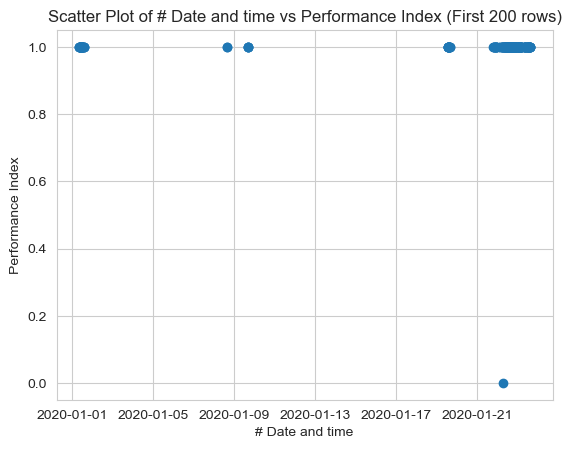

In [115]:
column_x = '# Date and time'
column_y = 'Performance Index'
#first 100 rows
plt.scatter(df.loc[:199, column_x], df.loc[:199, column_y])
plt.title(f'Scatter Plot of {column_x} vs {column_y} (First 200 rows)')
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.show()

C:\Users\vigne\AppData\Local\Temp\ipykernel_6516\3166110000.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df[numeric_columns] = downsampled_df[numeric_columns].rolling(window=window_size).mean().dropna()


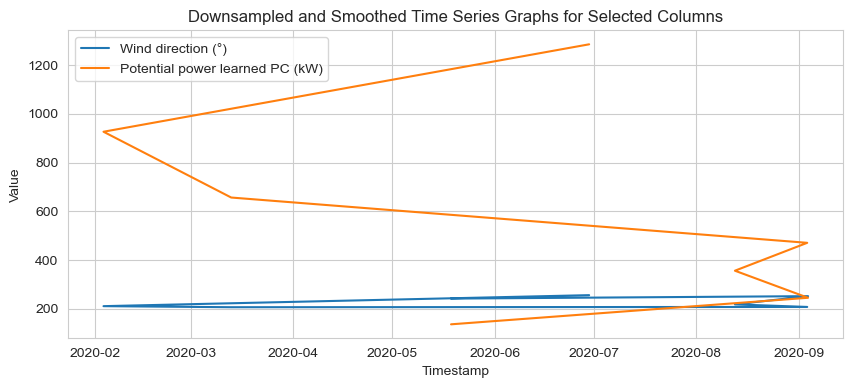

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'timestamp' is the datetime column in your DataFrame
df['# Date and time'] = pd.to_datetime(df['# Date and time'])

# Downsample by selecting every nth row
n = 5000 
downsampled_df = df.iloc[::n]

# Apply a rolling average to numeric columns to smooth the data
window_size = 4  
numeric_columns = ['Wind direction (°)', 'Potential power learned PC (kW)']
downsampled_df[numeric_columns] = downsampled_df[numeric_columns].rolling(window=window_size).mean().dropna()

# List of selected columns for the time series graph
selected_columns = ['Wind direction (°)', 'Potential power learned PC (kW)']

# Plotting time series graphs for all selected columns
plt.figure(figsize=(10,4))  

for column in selected_columns:
    plt.plot(downsampled_df['# Date and time'], downsampled_df[column], label=column)

plt.title('Downsampled and Smoothed Time Series Graphs for Selected Columns')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()